In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [56]:
csidf = pd.read_excel("subcarriers_amp_pos_pot.xlsx", sheet_name="subcarriers_amp_pos_pot")
csidf.drop("Unnamed: 0", axis=1, inplace=True)
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0,0,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0,0,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0,0,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,DIR,A1,1,3,82,2482,19.157725,33.949590,0,0,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,DIR,A1,1,3,43,736,16.433430,28.670187,0,0,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214


In [57]:
def dbmtopot(dbm):
    return 10**(dbm/10)

In [58]:
csidf[csidf.columns[8:]] = csidf[csidf.columns[8:]].apply(dbmtopot)

In [59]:
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,1.0,1.0,...,161.834907,79.432823,50.459000,32.604279,28.577352,19.082042,22.916435,1.673427,1.000000,1.384909
1,DIR,A1,1,3,91,2902,19.625982,34.627993,1.0,1.0,...,256.046543,166.096443,87.427646,59.156778,55.773117,36.479589,31.622777,2.293798,1.673427,1.000000
2,DIR,A1,1,3,79,1819,19.009755,32.599737,1.0,1.0,...,126.584230,64.725740,55.773117,38.118766,27.026021,22.149422,19.082042,1.673427,1.258925,1.384909
3,DIR,A1,1,3,82,2482,19.157725,33.949590,1.0,1.0,...,156.837474,87.427646,50.459000,35.944705,31.622777,18.403951,16.001454,1.584893,1.000000,1.258925
4,DIR,A1,1,3,43,736,16.433430,28.670187,1.0,1.0,...,100.000000,56.141701,33.354514,22.916435,20.667819,20.129847,17.255664,1.673427,1.258925,1.384909


In [60]:
#Divisão dos dados em conjunto de treino e teste
from sklearn.model_selection import train_test_split #Importa a função de split

In [61]:
from sklearn.preprocessing import Normalizer
teste_df = csidf[csidf.columns[8:70]]
transformer = Normalizer(norm="l1").fit(teste_df)  # fit does nothing.
transformer
teste_df = transformer.transform(teste_df)
data_lltf = pd.DataFrame(teste_df)
teste_df = csidf[csidf.columns[70:134]]
transformer = Normalizer(norm="l1").fit(teste_df)  # fit does nothing.
transformer
teste_df = transformer.transform(teste_df)
data_ht_ltf = pd.DataFrame(teste_df)
csidf[csidf.columns[70:134]] = data_ht_ltf
csidf[csidf.columns[8:70]] = data_lltf

In [65]:
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0.000145,0.000145,...,0.000129,0.000063,0.000040,0.000026,0.000023,0.000015,0.000018,1.337655e-06,7.993505e-07,1.107028e-06
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0.000110,0.000110,...,0.000141,0.000091,0.000048,0.000033,0.000031,0.000020,0.000017,1.261946e-06,9.206458e-07,5.501559e-07
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0.000114,0.000114,...,0.000066,0.000034,0.000029,0.000020,0.000014,0.000012,0.000010,8.759007e-07,6.589433e-07,7.248855e-07
3,DIR,A1,1,3,82,2482,19.157725,33.949590,0.000117,0.000117,...,0.000089,0.000050,0.000029,0.000020,0.000018,0.000010,0.000009,9.005149e-07,5.681865e-07,7.153044e-07
4,DIR,A1,1,3,43,736,16.433430,28.670187,0.000239,0.000239,...,0.000225,0.000126,0.000075,0.000052,0.000046,0.000045,0.000039,3.763545e-06,2.831329e-06,3.114667e-06


In [66]:
#Usando LLTF apenas e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:70]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 63.02%
Total de acerto da repeticao 1: 60.94%
Total de acerto da repeticao 2: 58.07%
Total de acerto da repeticao 3: 61.72%
Total de acerto da repeticao 4: 59.11%
Total de acerto da repeticao 5: 58.85%
Total de acerto da repeticao 6: 59.38%
Total de acerto da repeticao 7: 61.46%
Total de acerto da repeticao 8: 59.11%
Total de acerto da repeticao 9: 59.64%


In [67]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_pot.xlsx",sheet_name='percent_acertos_lltf_semdir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.43750,0.56250,0.71875,0.87500,0.43750,0.62500,0.84375,0.59375,0.68750,0.53125,0.46875,0.78125,0.6302
1,0.46875,0.62500,0.68750,0.84375,0.31250,0.68750,0.81250,0.50000,0.59375,0.56250,0.53125,0.68750,0.6094
2,0.50000,0.53125,0.71875,0.71875,0.34375,0.65625,0.65625,0.62500,0.75000,0.56250,0.34375,0.56250,0.5807
3,0.34375,0.68750,0.75000,0.65625,0.31250,0.71875,0.81250,0.59375,0.78125,0.53125,0.59375,0.62500,0.6172
4,0.46875,0.62500,0.75000,0.65625,0.46875,0.68750,0.71875,0.65625,0.53125,0.40625,0.53125,0.59375,0.5911
5,0.37500,0.62500,0.75000,0.81250,0.37500,0.65625,0.68750,0.65625,0.65625,0.37500,0.46875,0.62500,0.5885
6,0.50000,0.59375,0.62500,0.68750,0.34375,0.68750,0.81250,0.46875,0.71875,0.43750,0.59375,0.65625,0.5938
7,0.37500,0.56250,0.65625,0.78125,0.50000,0.71875,0.84375,0.56250,0.71875,0.43750,0.43750,0.78125,0.6146
8,0.40625,0.56250,0.75000,0.59375,0.43750,0.75000,0.78125,0.43750,0.78125,0.53125,0.37500,0.68750,0.5911
9,0.46875,0.43750,0.84375,0.68750,0.28125,0.71875,0.71875,0.50000,0.65625,0.56250,0.59375,0.68750,0.5964


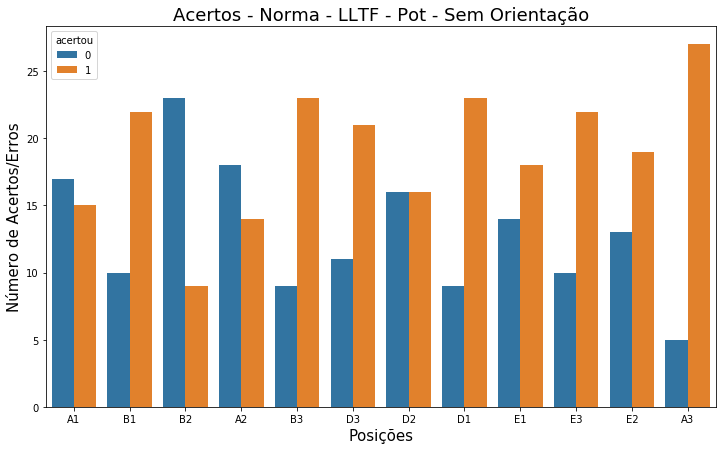

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - LLTF - Pot - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_pot_LLTF_sem_orientacao.png")

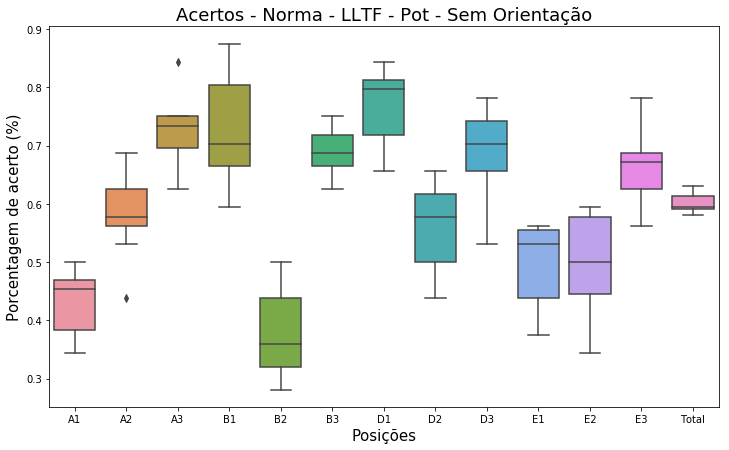

In [69]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Norma - LLTF - Pot - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_pot_LLTF_sem_orientacao.png")

In [70]:
#Usando LLTF apenas e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:70]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 74.74%
Total de acerto da repeticao 1: 76.56%
Total de acerto da repeticao 2: 77.6%
Total de acerto da repeticao 3: 81.77%
Total de acerto da repeticao 4: 74.48%
Total de acerto da repeticao 5: 73.96%
Total de acerto da repeticao 6: 75.26%
Total de acerto da repeticao 7: 73.7%
Total de acerto da repeticao 8: 73.96%
Total de acerto da repeticao 9: 73.96%


In [71]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_pot.xlsx",sheet_name='percent_acertos_lltf_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.75000,0.75000,0.87500,0.75000,0.62500,0.81250,0.93750,0.56250,0.78125,0.56250,0.68750,0.87500,0.7474
1,0.78125,0.84375,0.90625,0.75000,0.59375,0.75000,0.81250,0.65625,0.84375,0.62500,0.71875,0.90625,0.7656
2,0.90625,0.75000,0.87500,0.68750,0.68750,0.84375,0.87500,0.71875,0.84375,0.56250,0.71875,0.84375,0.7760
3,0.84375,0.84375,0.81250,0.71875,0.62500,0.93750,0.93750,0.84375,0.90625,0.59375,0.84375,0.90625,0.8177
4,0.71875,0.75000,0.84375,0.78125,0.59375,0.78125,0.84375,0.68750,0.84375,0.62500,0.68750,0.78125,0.7448
5,0.81250,0.68750,0.84375,0.81250,0.46875,0.75000,0.87500,0.68750,0.81250,0.56250,0.71875,0.84375,0.7396
6,0.71875,0.75000,0.84375,0.81250,0.43750,0.81250,0.93750,0.75000,0.87500,0.59375,0.68750,0.81250,0.7526
7,0.75000,0.78125,0.81250,0.75000,0.56250,0.75000,0.93750,0.71875,0.78125,0.68750,0.56250,0.75000,0.7370
8,0.78125,0.68750,0.75000,0.68750,0.37500,0.81250,0.96875,0.87500,0.87500,0.68750,0.56250,0.81250,0.7396
9,0.75000,0.75000,0.81250,0.71875,0.46875,0.71875,0.90625,0.81250,0.84375,0.62500,0.78125,0.68750,0.7396


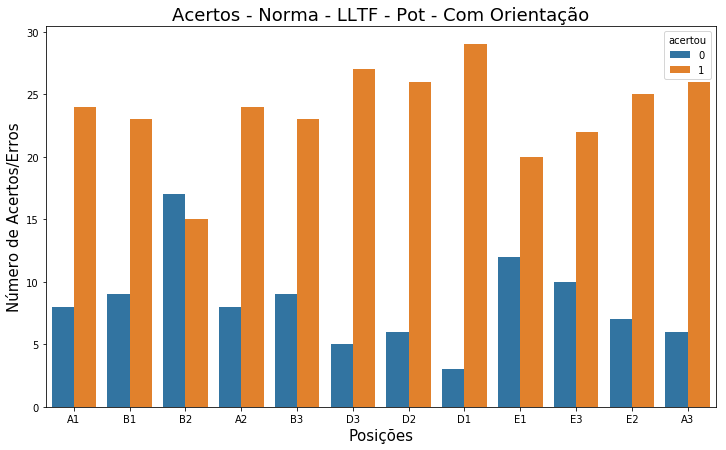

In [72]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - LLTF - Pot - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_Pot_LLTF_com_orientacao.png")

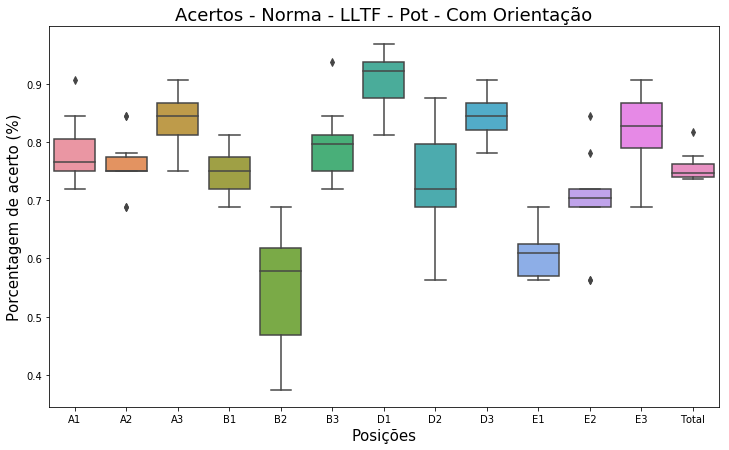

In [73]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Norma - LLTF - Pot - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot__norma_Pot_LLTF_com_orientacao.png")

In [74]:
#Usando HT-LTF apenas e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 57.03%
Total de acerto da repeticao 1: 54.43%
Total de acerto da repeticao 2: 54.69%
Total de acerto da repeticao 3: 55.73%
Total de acerto da repeticao 4: 58.07%
Total de acerto da repeticao 5: 55.73%
Total de acerto da repeticao 6: 57.81%
Total de acerto da repeticao 7: 57.81%
Total de acerto da repeticao 8: 56.51%
Total de acerto da repeticao 9: 54.69%


In [75]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_pot.xlsx",sheet_name='percent_acertos_HT_sem_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.43750,0.56250,0.84375,0.65625,0.31250,0.75000,0.71875,0.50000,0.68750,0.46875,0.34375,0.56250,0.5703
1,0.46875,0.50000,0.68750,0.53125,0.37500,0.68750,0.65625,0.40625,0.78125,0.53125,0.37500,0.53125,0.5443
2,0.46875,0.53125,0.68750,0.59375,0.28125,0.68750,0.59375,0.46875,0.59375,0.59375,0.50000,0.56250,0.5469
3,0.34375,0.53125,0.75000,0.62500,0.34375,0.68750,0.68750,0.34375,0.84375,0.43750,0.50000,0.59375,0.5573
4,0.50000,0.50000,0.84375,0.65625,0.34375,0.56250,0.84375,0.43750,0.71875,0.59375,0.46875,0.50000,0.5807
5,0.34375,0.62500,0.75000,0.68750,0.25000,0.65625,0.84375,0.53125,0.65625,0.43750,0.40625,0.50000,0.5573
6,0.25000,0.50000,0.81250,0.71875,0.37500,0.62500,0.75000,0.53125,0.78125,0.43750,0.53125,0.62500,0.5781
7,0.37500,0.37500,0.75000,0.59375,0.34375,0.71875,0.84375,0.34375,0.87500,0.56250,0.50000,0.65625,0.5781
8,0.31250,0.53125,0.75000,0.62500,0.37500,0.75000,0.81250,0.40625,0.71875,0.50000,0.46875,0.53125,0.5651
9,0.53125,0.50000,0.75000,0.68750,0.28125,0.65625,0.78125,0.31250,0.71875,0.37500,0.37500,0.59375,0.5469


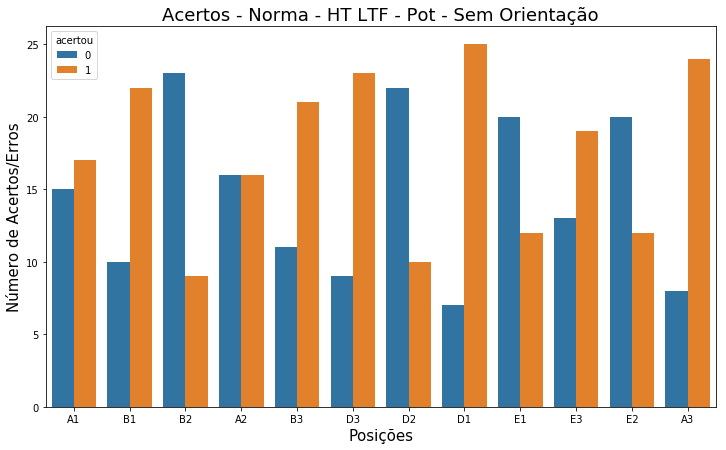

In [76]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - HT LTF - Pot - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_pot_HT_LTF_Sem_orientacao.png")

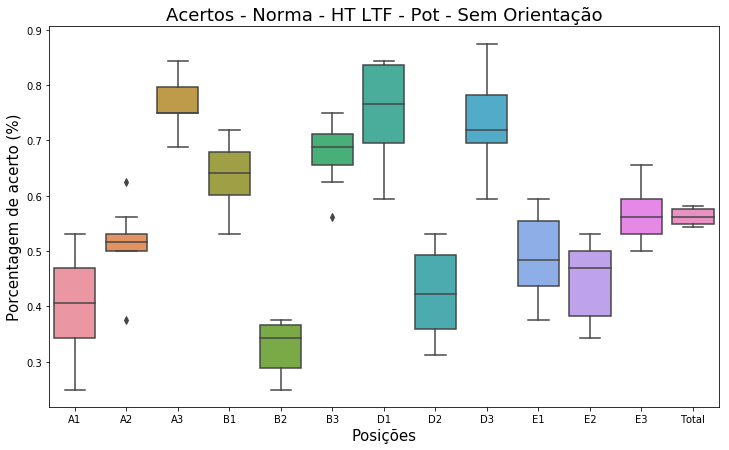

In [77]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Norma - HT LTF - Pot - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_pot_HT_LTF_Sem_orientacao.png")

In [78]:
#Usando HT LTF apenas e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[70:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 69.79%
Total de acerto da repeticao 1: 71.09%
Total de acerto da repeticao 2: 72.14%
Total de acerto da repeticao 3: 70.57%
Total de acerto da repeticao 4: 67.97%
Total de acerto da repeticao 5: 69.79%
Total de acerto da repeticao 6: 71.61%
Total de acerto da repeticao 7: 71.88%
Total de acerto da repeticao 8: 73.44%
Total de acerto da repeticao 9: 71.88%


In [79]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_pot.xlsx",sheet_name='percent_acertos_HT_com_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.65625,0.75000,0.87500,0.71875,0.31250,0.81250,0.96875,0.53125,0.84375,0.53125,0.62500,0.75000,0.6979
1,0.68750,0.62500,0.93750,0.84375,0.43750,0.78125,0.81250,0.75000,0.78125,0.53125,0.59375,0.75000,0.7109
2,0.71875,0.56250,0.90625,0.78125,0.53125,0.81250,0.96875,0.62500,0.90625,0.50000,0.53125,0.81250,0.7214
3,0.71875,0.50000,0.96875,0.71875,0.40625,0.65625,0.93750,0.62500,0.84375,0.59375,0.68750,0.81250,0.7057
4,0.65625,0.65625,0.84375,0.84375,0.34375,0.90625,0.90625,0.59375,0.81250,0.46875,0.43750,0.68750,0.6797
5,0.65625,0.59375,0.84375,0.71875,0.34375,0.81250,0.96875,0.75000,0.78125,0.62500,0.50000,0.78125,0.6979
6,0.68750,0.62500,0.90625,0.75000,0.34375,0.84375,0.87500,0.50000,0.90625,0.71875,0.59375,0.84375,0.7161
7,0.59375,0.65625,0.93750,0.81250,0.56250,0.87500,0.90625,0.56250,0.68750,0.59375,0.59375,0.84375,0.7188
8,0.62500,0.75000,1.00000,0.81250,0.28125,0.81250,0.93750,0.56250,0.90625,0.71875,0.65625,0.75000,0.7344
9,0.71875,0.56250,0.84375,0.75000,0.59375,0.71875,0.93750,0.71875,0.93750,0.71875,0.56250,0.56250,0.7188


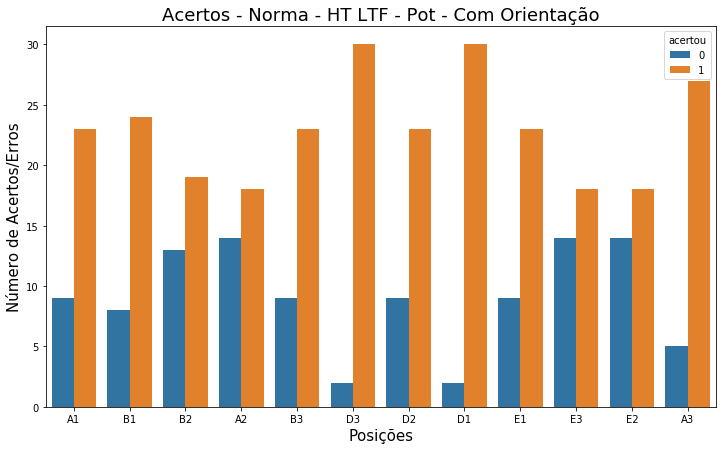

In [80]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - Norma - HT LTF - Pot - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_Pot_HT_LTF_Com_orientacao.png")

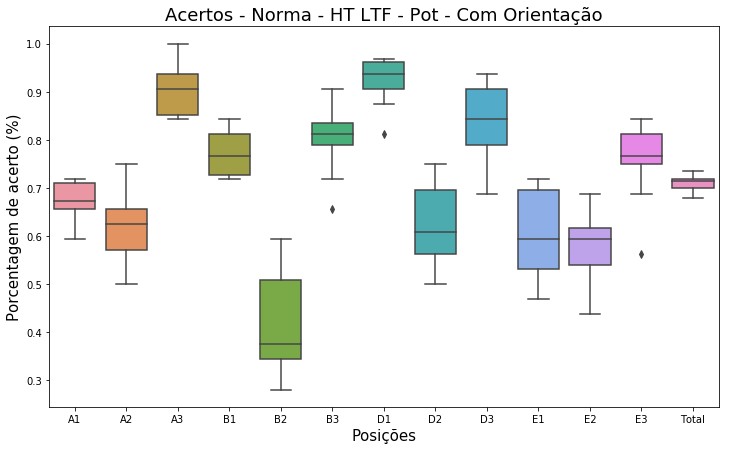

In [81]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - Norma - HT LTF - Pot - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_Pot_HT_LTF_Com_orientacao.png")

In [82]:
#Usando HT-LTF + LLTF e não considerando a direção - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 57.81%
Total de acerto da repeticao 1: 57.55%
Total de acerto da repeticao 2: 65.36%
Total de acerto da repeticao 3: 60.94%
Total de acerto da repeticao 4: 61.72%
Total de acerto da repeticao 5: 63.54%
Total de acerto da repeticao 6: 63.54%
Total de acerto da repeticao 7: 60.16%
Total de acerto da repeticao 8: 62.76%
Total de acerto da repeticao 9: 61.72%


In [83]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_pot.xlsx",sheet_name='perc_LLTF_HTLTF_no_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.40625,0.53125,0.68750,0.65625,0.25000,0.84375,0.78125,0.50000,0.62500,0.40625,0.59375,0.65625,0.5781
1,0.50000,0.53125,0.56250,0.62500,0.21875,0.78125,0.84375,0.62500,0.71875,0.43750,0.43750,0.62500,0.5755
2,0.62500,0.43750,0.81250,0.65625,0.40625,0.87500,0.81250,0.68750,0.81250,0.56250,0.53125,0.62500,0.6536
3,0.43750,0.56250,0.81250,0.59375,0.40625,0.81250,0.78125,0.56250,0.84375,0.40625,0.46875,0.62500,0.6094
4,0.59375,0.53125,0.81250,0.62500,0.40625,0.62500,0.87500,0.62500,0.65625,0.40625,0.59375,0.65625,0.6172
5,0.65625,0.65625,0.87500,0.75000,0.34375,0.78125,0.84375,0.46875,0.68750,0.53125,0.37500,0.65625,0.6354
6,0.56250,0.56250,0.84375,0.71875,0.28125,0.81250,0.84375,0.56250,0.78125,0.46875,0.50000,0.68750,0.6354
7,0.46875,0.46875,0.84375,0.50000,0.15625,0.78125,0.84375,0.59375,0.78125,0.53125,0.59375,0.65625,0.6016
8,0.62500,0.50000,0.78125,0.78125,0.37500,0.71875,0.71875,0.56250,0.71875,0.56250,0.46875,0.71875,0.6276
9,0.53125,0.56250,0.59375,0.62500,0.40625,0.78125,0.84375,0.56250,0.78125,0.62500,0.40625,0.68750,0.6172


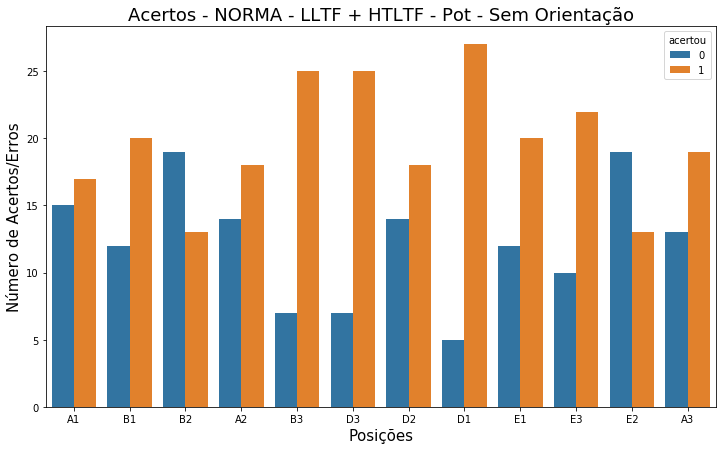

In [84]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - NORMA - LLTF + HTLTF - Pot - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_pot_LLTF_HT_LTF_Sem_dir.png")

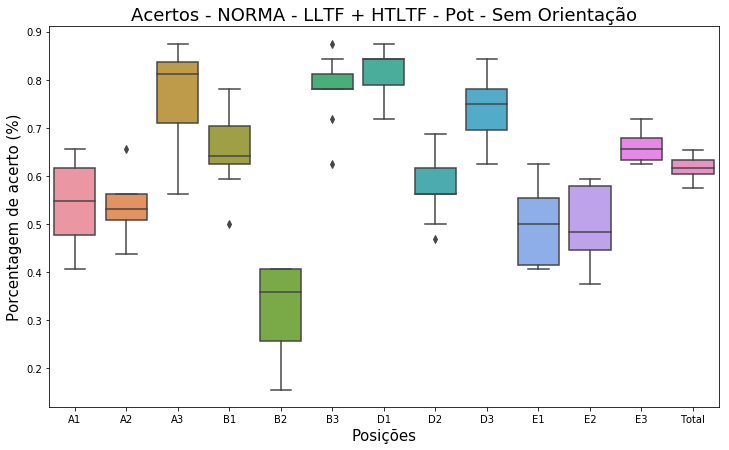

In [85]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - NORMA - LLTF + HTLTF - Pot - Sem Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_pot_LLTF_HT_LTF_Sem_dir.png")

In [86]:
#Usando HT-LTF + LLTF e CONSIDERANDO A ORIENTAÇÃO!!! - Multiplas vezes
total_repeticoes = 10
colunas = csidf.columns[8:134]
locais = sorted(csidf["local"].unique())
percent_acertos_df = pd.DataFrame(columns=locais,index=range(total_repeticoes))
percent_acertos_df["Total"]=0.00
for n in range(total_repeticoes):
    aux = 0
    for k in csidf["local"].unique():
        for j in csidf["device"].unique():
            data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
            datalltf= data_y[colunas]
            if aux==0:
                X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
                aux=aux+1
            else:
                X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
                X_train = X_train.append(X_train_aux)
                X_test = X_test.append(X_test_aux)
                y_train = y_train.append(y_train_aux)
                y_test = y_test.append(y_test_aux)
    minmeansquareerror = []
    best_index_match = []
    best_atual_index = 0
    menor_mse = 10000
    mse_atual = 0
    for k  in X_test.index:
    # k = X_test.index[3]
        menor_mse = 10000
        best_atual_index = 0
        for j in X_train.index:
            mse_atual = 0
            if csidf["device"][k]==csidf["device"][j]:
                for w in X_train.columns:
                    mse_atual += (X_train[w][j] - X_test[w][k])**(2)
                if mse_atual < menor_mse:
                    menor_mse = mse_atual
                    best_atual_index = j
        minmeansquareerror.append(menor_mse)
        best_index_match.append(best_atual_index)
    # print(minmeansquareerror)
    # print(best_index_match)
    # print("A localização real é:" + y_test[k])
    # print("A resposta do algoritmo deu:" + y_train[best_index_match])
    #GERANDO UMA TABELA DE COMPARAÇÃO
    cols = ["index","real_location","estimated_location","acertou"]
    compare_table = pd.DataFrame(columns=cols)
    compare_table["index"] = y_test.index
    for x in range(len(compare_table)):
        compare_table["real_location"][x]=y_test[y_test.index[x]]

    x=0
    for i in best_index_match:
        compare_table["estimated_location"][x] = y_train[i]
        if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
            compare_table["acertou"][x]=1
        else:
            compare_table["acertou"][x]=0
        x=x+1

    for h in locais:
        acertos = len(compare_table[(compare_table["real_location"]==h) & (compare_table["acertou"]==1)])/len(compare_table[compare_table["real_location"]==h])
        percent_acertos_df[h][n]=acertos
    total = round((((len(compare_table[compare_table["acertou"]==1])/(len(compare_table))))*100),2)
    percent_acertos_df["Total"][n]= total
    print("Total de acerto da repeticao "+ str(n) +": " + str(total) + "%")

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Total de acerto da repeticao 0: 73.44%
Total de acerto da repeticao 1: 76.82%
Total de acerto da repeticao 2: 78.39%
Total de acerto da repeticao 3: 80.73%
Total de acerto da repeticao 4: 73.44%
Total de acerto da repeticao 5: 74.74%
Total de acerto da repeticao 6: 76.56%
Total de acerto da repeticao 7: 76.56%
Total de acerto da repeticao 8: 74.22%
Total de acerto da repeticao 9: 77.08%


In [87]:
percent_acertos_df["Total"] = percent_acertos_df["Total"]/100
percent_acertos_df = percent_acertos_df.astype(float)
percent_acertos_df.to_excel("Localizacao_norm_pot.xlsx",sheet_name='perc_LLTF_HTLTF_dir_df')
percent_acertos_df

,A1,A2,A3,B1,B2,B3,D1,D2,D3,E1,E2,E3,Total
0,0.62500,0.78125,0.96875,0.68750,0.43750,0.90625,0.93750,0.56250,0.87500,0.65625,0.59375,0.78125,0.7344
1,0.71875,0.71875,0.96875,0.78125,0.56250,0.87500,0.93750,0.59375,0.87500,0.81250,0.65625,0.71875,0.7682
2,0.68750,0.81250,0.87500,0.84375,0.59375,0.90625,0.96875,0.81250,0.84375,0.56250,0.62500,0.87500,0.7839
3,0.87500,0.78125,1.00000,0.84375,0.56250,0.87500,0.96875,0.68750,0.87500,0.68750,0.71875,0.81250,0.8073
4,0.56250,0.75000,0.78125,0.81250,0.37500,0.87500,0.90625,0.75000,0.93750,0.65625,0.59375,0.81250,0.7344
5,0.71875,0.71875,0.87500,0.78125,0.53125,0.90625,0.90625,0.59375,0.87500,0.68750,0.62500,0.75000,0.7474
6,0.65625,0.71875,0.87500,0.81250,0.56250,0.87500,0.90625,0.68750,0.87500,0.62500,0.68750,0.90625,0.7656
7,0.71875,0.90625,0.90625,0.93750,0.43750,0.84375,0.90625,0.68750,0.68750,0.62500,0.68750,0.84375,0.7656
8,0.62500,0.78125,0.87500,0.65625,0.50000,0.93750,0.87500,0.59375,0.84375,0.65625,0.68750,0.87500,0.7422
9,0.65625,0.84375,0.90625,0.81250,0.56250,0.93750,0.96875,0.65625,0.75000,0.75000,0.71875,0.68750,0.7708


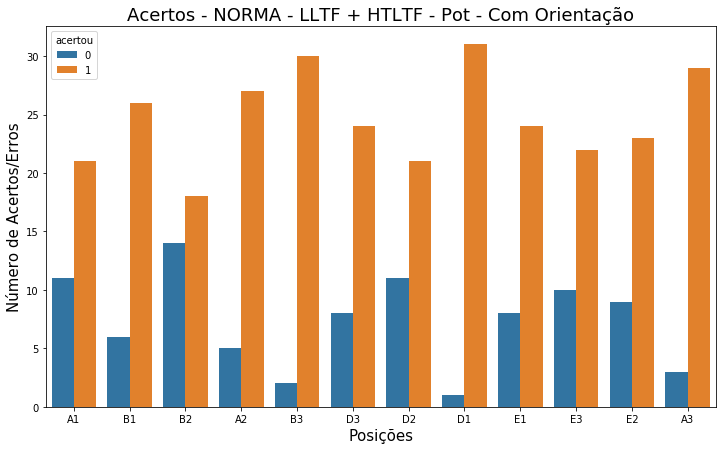

In [88]:
plt.figure(figsize=(12,7))
sns.countplot(x="real_location",hue="acertou",data=compare_table)
plt.title("Acertos - NORMA - LLTF + HTLTF - Pot - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Número de Acertos/Erros", fontsize=15)
plt.savefig("countplot_norma_pot_LLTF_HT_LTF_dir.png")

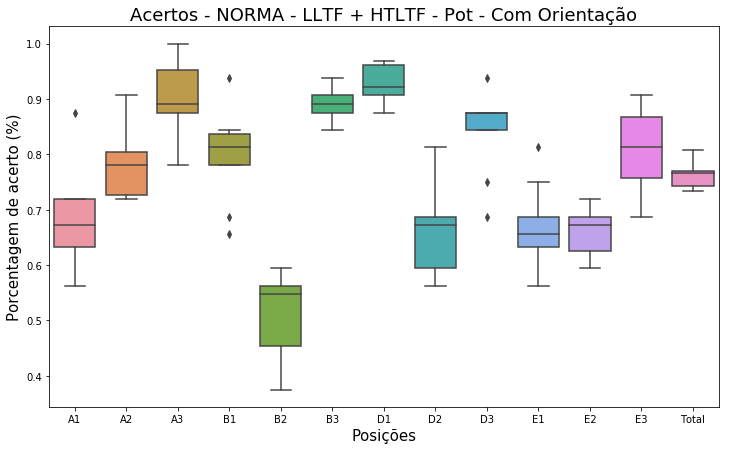

In [89]:
plt.figure(figsize=(12,7))
sns.boxplot(data=percent_acertos_df)
plt.title("Acertos - NORMA - LLTF + HTLTF - Pot - Com Orientação", fontsize=18)
plt.xlabel("Posições", fontsize=15)
plt.ylabel("Porcentagem de acerto (%)", fontsize=15)
plt.savefig("boxplot_norma_pot_LLTF_HT_LTF_dir.png")